<a href="https://colab.research.google.com/github/YogeshRajgure/iNeuron_Assignments/blob/main/Assignment8_YogeshRajgure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.**

Hint:

import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition

from sklearn import datasets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets
import seaborn as sns

In [ ]:
df = sns.load_dataset("iris")
df.rename(columns={'species':'target'}, inplace = True)
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
features = list(df.columns)
features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [ ]:
x = df.loc[ : , features[:-1]].values
y = df.loc[ : , features[-1]].values

In [ ]:
import pandas as pd
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principalComponent1',
                                      'principalComponent2',
                                      'principalComponent3'])

In [ ]:
finalDf = pd.concat([principalDf , df[["target"]]], axis = 1)

In [ ]:
x_vals = finalDf["principalComponent1"]
y_vals = finalDf["principalComponent2"]
z_vals = finalDf["principalComponent3"]

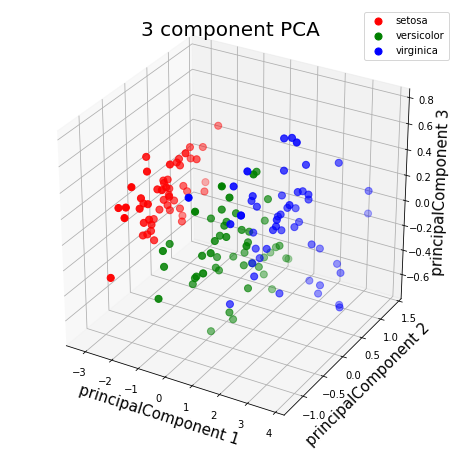

In [ ]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("principalComponent 1", fontsize = 15)
ax.set_ylabel("principalComponent 2", fontsize = 15)
ax.set_zlabel("principalComponent 3", fontsize = 15)
ax.set_title("3 component PCA", fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ["r","g","b"]

for target, color in zip(targets, colors):
    indicesTokeep = finalDf["target"] == target
    # indicesToKeep is the bool type series 
    
    ax.scatter(finalDf.loc[indicesTokeep, 'principalComponent1']
              ,finalDf.loc[indicesTokeep, 'principalComponent2']
              ,finalDf.loc[indicesTokeep, 'principalComponent3']
              , c = color, s = 50)

ax.legend(targets)
ax.grid()

#final figure 
plt.show()

In [ ]:
list(df.loc[indicesTokeep, "sepal_length"])

[6.3,
 5.8,
 7.1,
 6.3,
 6.5,
 7.6,
 4.9,
 7.3,
 6.7,
 7.2,
 6.5,
 6.4,
 6.8,
 5.7,
 5.8,
 6.4,
 6.5,
 7.7,
 7.7,
 6.0,
 6.9,
 5.6,
 7.7,
 6.3,
 6.7,
 7.2,
 6.2,
 6.1,
 6.4,
 7.2,
 7.4,
 7.9,
 6.4,
 6.3,
 6.1,
 7.7,
 6.3,
 6.4,
 6.0,
 6.9,
 6.7,
 6.9,
 5.8,
 6.8,
 6.7,
 6.7,
 6.3,
 6.5,
 6.2,
 5.9]